/var/folders/k2/y6l1lrks5pl__zc8pp4zn73w0000gn/T/ipykernel_7913/867501912.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  cat_fig.show()
/var/folders/k2/y6l1lrks5pl__zc8pp4zn73w0000gn/T/ipykernel_7913/867501912.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  heat_fig.show()


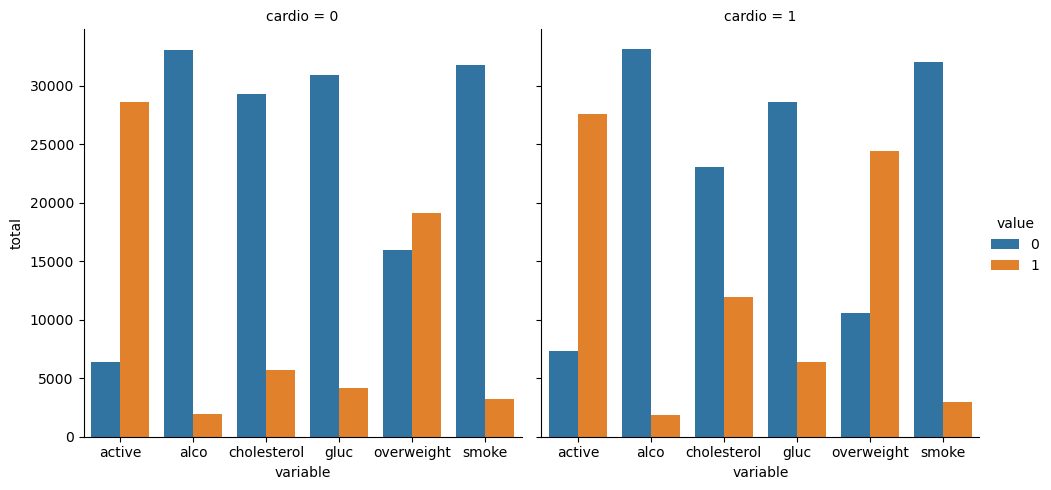

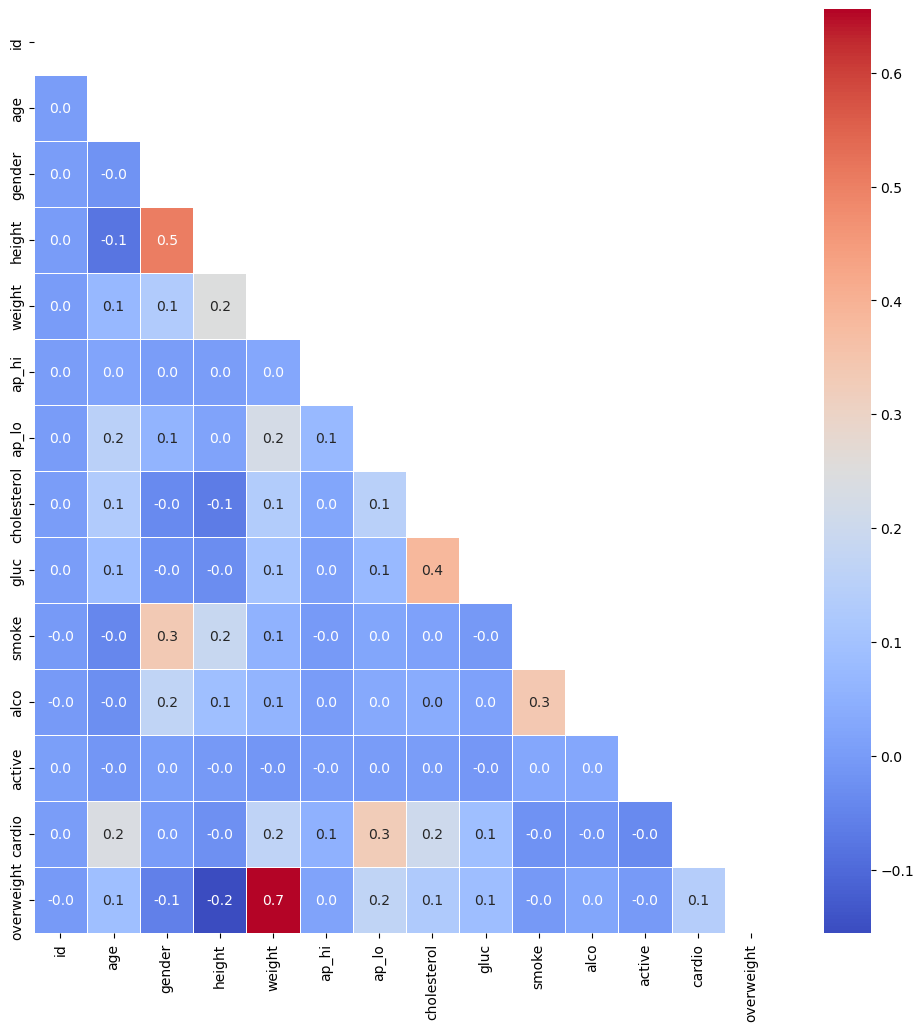

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Task 1: Import data
df = pd.read_csv('/Users/anks/Jupyter Files/medical_examination.csv')

# Task 2: Add overweight column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2).apply(lambda x: 1 if x > 25 else 0)

# Task 3: Normalize data
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

def draw_cat_plot():
    # Task 4: Create DataFrame for cat plot using pd.melt
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Task 5: Group and reformat data to split by 'cardio'
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).size().rename(columns={'size': 'total'})

    # Task 6: Draw the catplot
    g = sns.catplot(x="variable", y="total", hue="value", col="cardio", data=df_cat, kind="bar", height=5, aspect=1)
    fig = g.fig

    # Task 7: Get the figure for the output
    return fig

def draw_heat_map():
    # Task 8: Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])]
    df_heat = df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025)) & (df_heat['height'] <= df_heat['height'].quantile(0.975))]
    df_heat = df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025)) & (df_heat['weight'] <= df_heat['weight'].quantile(0.975))]

    # Task 9: Calculate the correlation matrix
    corr = df_heat.corr()

    # Task 10: Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Task 11: Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Task 12: Draw the heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".1f", ax=ax, cmap="coolwarm", linewidths=.5)

    # Task 13: Do not modify the next two lines
    return fig


# Test the functions
cat_fig = draw_cat_plot()
cat_fig.show()

heat_fig = draw_heat_map()
heat_fig.show()

